In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

import csv

#pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [171]:
sugar1= pd.read_csv('Sugarscape1-5.csv')
sugar2= pd.read_csv('Sugarscape2-5.csv')

In [172]:
sugar1.columns

Index(['[run number]', 'visualization', 'initial-population', '[step]',
       'count turtles', 'mean-of-vision', 'mean-of-metabolism',
       'mean [metabolism] of turtles', 'mean [vision] of turtles',
       '(count turtles) / (initial-population)',
       '(count good_vision_turtles) / (initial-population)',
       '(count good_metabolism_turtles) / (initial-population)',
       '(count bad_vision_turtles) / (initial-population)',
       '(count bad_metabolism_turtles) / (initial-population)'],
      dtype='object')

In [173]:
sugarscape1 = sugar1.loc[:,['initial-population',
       'count turtles', 'mean-of-vision', 'mean-of-metabolism','mean [metabolism] of turtles',
       'mean [vision] of turtles', '(count turtles) / (initial-population)',
       '(count good_vision_turtles) / (initial-population)',
       '(count good_metabolism_turtles) / (initial-population)',
       '(count bad_vision_turtles) / (initial-population)',
       '(count bad_metabolism_turtles) / (initial-population)']]
sugarscape2 = sugar2.loc[:,['initial-population',
       'count turtles', 'mean-of-vision', 'mean-of-metabolism','mean [metabolism] of turtles',
       'mean [vision] of turtles', '(count turtles) / (initial-population)',
       '(count good_vision_turtles) / (initial-population)',
       '(count good_metabolism_turtles) / (initial-population)',
       '(count bad_vision_turtles) / (initial-population)',
       '(count bad_metabolism_turtles) / (initial-population)']]

In [174]:
sugar1_mean = sugarscape1.groupby("initial-population").mean()
sugar2_mean = sugarscape2.groupby("initial-population").mean()

In [175]:
sugar1_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 100 to 1000
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   count turtles                                           46 non-null     float64
 1   mean-of-vision                                          46 non-null     float64
 2   mean-of-metabolism                                      46 non-null     float64
 3   mean [metabolism] of turtles                            46 non-null     float64
 4   mean [vision] of turtles                                46 non-null     float64
 5   (count turtles) / (initial-population)                  46 non-null     float64
 6   (count good_vision_turtles) / (initial-population)      46 non-null     float64
 7   (count good_metabolism_turtles) / (initial-population)  46 non-null     float64
 8   (count bad_vision_turtles) / (initial-

In [176]:
sugar1_mean = sugar1_mean.rename_axis('initial-population').reset_index()
sugar2_mean = sugar2_mean.rename_axis('initial-population').reset_index()

In [161]:
#choose the range of initial population
sugar1_mean = sugar1_mean.loc[(sugar1_mean['initial-population'] >= 200) & (sugar1_mean['initial-population'] <= 800)]
sugar2_mean = sugar2_mean.loc[(sugar2_mean['initial-population'] >= 200) & (sugar2_mean['initial-population'] <= 800)]

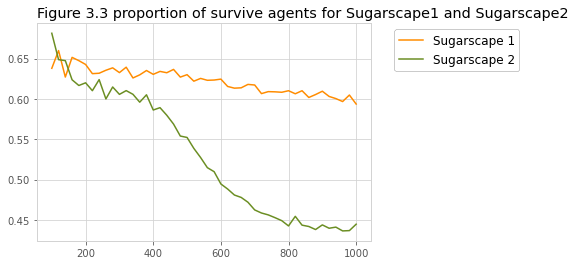

<Figure size 1296x864 with 0 Axes>

In [301]:
#matplotlib
x = sugar1_mean['initial-population']
y1 = sugar1_mean['(count turtles) / (initial-population)']
y2 = sugar2_mean['(count turtles) / (initial-population)']
fig, ax = plt.subplots()
fig = plt.figure(figsize=(18,12))
# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y1, label='Sugarscape 1',color='darkorange')
#line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y2, label='Sugarscape 2',color='olivedrab')

ax.spines['bottom'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')

fontP = FontProperties()
fontP.set_size('large')
#ax.legend(handles=[line1, line2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

legend = ax.legend(handles=[line1, line2], bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('grey')

ax.set_title(f"Figure 3.3 proportion of survive agents for Sugarscape1 and Sugarscape2",loc = "left")
ax.grid(True,color='lightgrey')
ax.set_facecolor('xkcd:white')
plt.show()

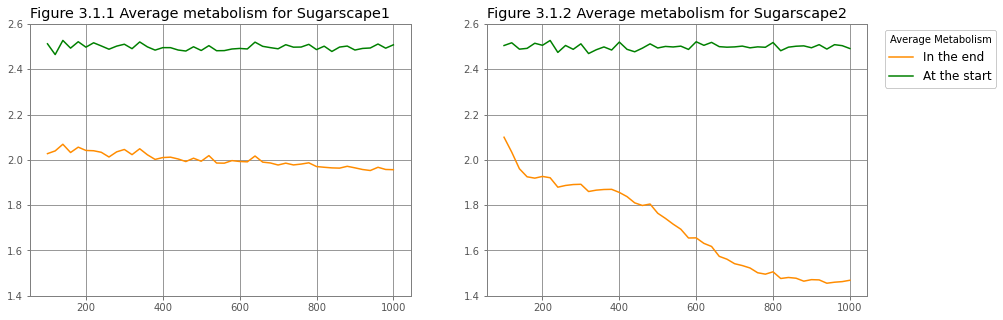

In [302]:
x = sugar1_mean['initial-population']
y1 = sugar1_mean['mean [metabolism] of turtles']
y2 = sugar1_mean['mean-of-metabolism']

y3 = sugar2_mean['mean [metabolism] of turtles']
y4 = sugar2_mean['mean-of-metabolism']

#f,axes = plt.subplots(1,6, figsize=(19,5))
fig, axes = plt.subplots(1,2, figsize=(15,5))
#fig = plt.figure(figsize=(30,20))
# Using set_dashes() to modify dashing of an existing line
line1, = axes[0].plot(x, y1, label='In the end',color='darkorange')
line2, = axes[0].plot(x,y2,label='At the start',color='green')
#line2.set_dashes([3, 2])  # 2pt line, 2pt break, 10pt line, 2pt break


line3, = axes[1].plot(x, y3, label='In the end',color='darkorange')
line4, = axes[1].plot(x,y4,label='At the start',color='green')
#line4.set_dashes([3, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

for i in 0,1:
    axes[i].spines['bottom'].set_color('grey')
    axes[i].spines['top'].set_color('grey')
    axes[i].spines['left'].set_color('grey')
    axes[i].spines['right'].set_color('grey')
    axes[i].grid(True,color='grey')
    axes[i].set_facecolor('xkcd:white')
    axes[i].set_ylim([1.4, 2.6])
    axes[i].set_title(f"Figure 3.1.{i+1} Average metabolism for Sugarscape{i+1}",loc = "left")

    
fontP = FontProperties()
fontP.set_size('large')
#ax.legend(handles=[line1, line2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
legend = axes[1].legend(handles=[line3,line4],title='Average Metabolism', bbox_to_anchor=(1.03, 1), loc='upper left', prop=fontP)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('grey')


plt.show()

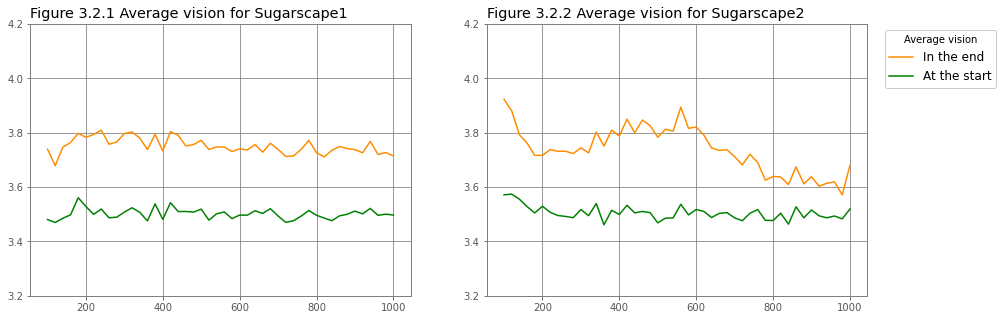

In [303]:
x = sugar1_mean['initial-population']
y1 = sugar1_mean['mean [vision] of turtles']
y2 = sugar1_mean['mean-of-vision']

y3 = sugar2_mean['mean [vision] of turtles']
y4 = sugar2_mean['mean-of-vision']

#f,axes = plt.subplots(1,6, figsize=(19,5))
fig, axes = plt.subplots(1,2, figsize=(15,5))
#fig = plt.figure(figsize=(30,20))
# Using set_dashes() to modify dashing of an existing line
line1, = axes[0].plot(x, y1, label='In the end',color='darkorange')
line2, = axes[0].plot(x,y2,label='At the start',color='green')
#line2.set_dashes([3, 2])  # 2pt line, 2pt break, 10pt line, 2pt break


line3, = axes[1].plot(x, y3, label='In the end',color='darkorange')
line4, = axes[1].plot(x,y4,label='At the start',color='green')
#line4.set_dashes([3, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

for i in 0,1:
    axes[i].spines['bottom'].set_color('grey')
    axes[i].spines['top'].set_color('grey')
    axes[i].spines['left'].set_color('grey')
    axes[i].spines['right'].set_color('grey')
    axes[i].grid(True,color='grey')
    axes[i].set_facecolor('xkcd:white')
    axes[i].set_ylim([3.2, 4.2])
    axes[i].set_title(f"Figure 3.2.{i+1} Average vision for Sugarscape{i+1}",loc = "left")

    
fontP = FontProperties()
fontP.set_size('large')
#ax.legend(handles=[line1, line2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
legend = axes[1].legend(handles=[line3,line4],title='Average vision', bbox_to_anchor=(1.03, 1), loc='upper left', prop=fontP)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('grey')


plt.show()

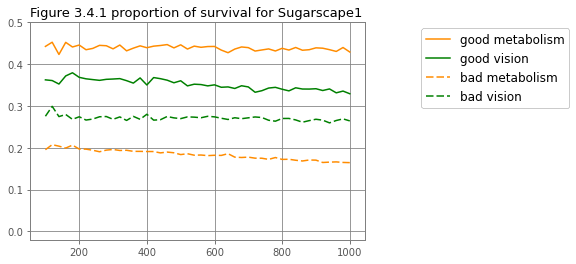

<Figure size 1296x864 with 0 Axes>

In [306]:
x = sugar1_mean['initial-population']
y1 = sugar1_mean['(count good_metabolism_turtles) / (initial-population)']
y2 = sugar1_mean['(count good_vision_turtles) / (initial-population)']
y3 = sugar1_mean['(count bad_metabolism_turtles) / (initial-population)']
y4 = sugar1_mean['(count bad_vision_turtles) / (initial-population)']

fig, ax = plt.subplots()
fig = plt.figure(figsize=(18,12))
# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y1, label='good metabolism',color='darkorange')
#line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y2, label='good vision',color='green')

line3, = ax.plot(x,y3,label='bad metabolism',color='darkorange')
line3.set_dashes([5, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
line4, = ax.plot(x,y4,label='bad vision',color='green')
line4.set_dashes([5, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['right'].set_color('grey')

fontP = FontProperties()
fontP.set_size('large')
#ax.legend(handles=[line1, line2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

legend = ax.legend(handles=[line1, line2,line3,line4],bbox_to_anchor=(1.15, 1), loc='upper left', prop=fontP)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('grey')

ax.set_title(f"Figure 3.4.1 proportion of survival for Sugarscape1",loc = "left",fontsize=13)
ax.grid(True,color='grey')
ax.set_ylim([-0.02,0.5])
ax.set_facecolor('xkcd:white')
plt.show()

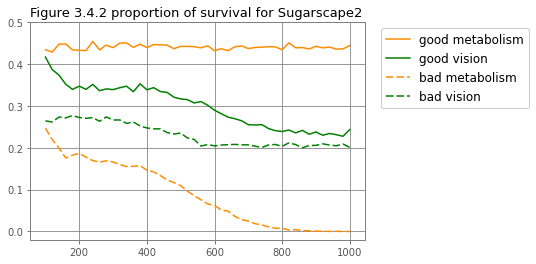

<Figure size 1296x864 with 0 Axes>

In [307]:
x = sugar2_mean['initial-population']
y1 = sugar2_mean['(count good_metabolism_turtles) / (initial-population)']
y2 = sugar2_mean['(count good_vision_turtles) / (initial-population)']
y3 = sugar2_mean['(count bad_metabolism_turtles) / (initial-population)']
y4 = sugar2_mean['(count bad_vision_turtles) / (initial-population)']

fig, ax = plt.subplots()
fig = plt.figure(figsize=(18,12))
# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y1, label='good metabolism',color='darkorange')
#line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y2, label='good vision',color='green')

line3, = ax.plot(x,y3,label='bad metabolism',color='darkorange')
line3.set_dashes([5, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
line4, = ax.plot(x,y4,label='bad vision',color='green')
line4.set_dashes([5, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['right'].set_color('grey')

fontP = FontProperties()
fontP.set_size('large')
#ax.legend(handles=[line1, line2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

legend = ax.legend(handles=[line1, line2,line3,line4], bbox_to_anchor=(1.03, 1), loc='upper left', prop=fontP)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('grey')

ax.set_title(f"Figure 3.4.2 proportion of survival for Sugarscape2",loc = "left",fontsize=13)
ax.grid(True,color='grey')
ax.set_ylim([-0.02,0.5])
ax.set_facecolor('xkcd:white')
plt.show()

## no need

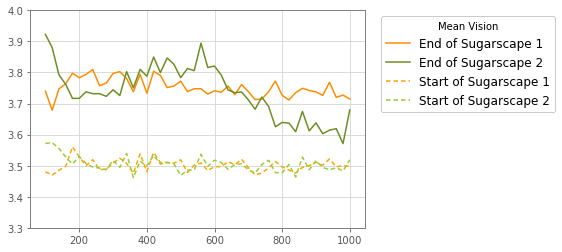

In [222]:
x = sugar1_mean['initial-population']
y1 = sugar1_mean['mean [vision] of turtles']
y2 = sugar2_mean['mean [vision] of turtles']
y3 = sugar1_mean['mean-of-vision']
y4 = sugar2_mean['mean-of-vision']

fig, ax = plt.subplots()
#fig = plt.figure(figsize=(30,20))
# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y1, label='End of Sugarscape 1',color='darkorange')

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y2, label='End of Sugarscape 2',color='olivedrab')

line3, = ax.plot(x,y3,label='Start of Sugarscape 1',color='orange')
line3.set_dashes([3, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
line4, = ax.plot(x,y4,label='Start of Sugarscape 2',color='yellowgreen')
line4.set_dashes([3, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['right'].set_color('grey')

fontP = FontProperties()
fontP.set_size('large')
#ax.legend(handles=[line1, line2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

legend = ax.legend(handles=[line1, line2,line3,line4],title='Mean Vision', bbox_to_anchor=(1.03, 1), loc='upper left', prop=fontP)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('grey')
#ax.set_title('Compare mean vision of S1 and S2 at the start and the end',loc = "left")
ax.grid(True,color='lightgrey')
ax.set_ylim([3.3, 4.0])
ax.set_facecolor('xkcd:white')
plt.show()

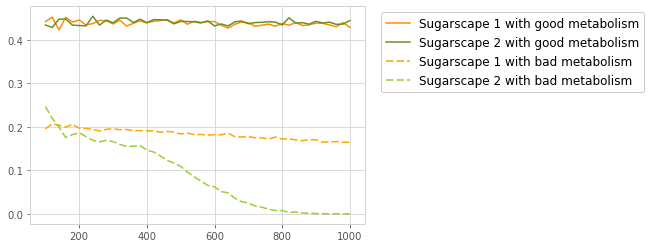

<Figure size 1296x864 with 0 Axes>

In [188]:
x = sugar1_mean['initial-population']
y1 = sugar1_mean['(count good_metabolism_turtles) / (initial-population)']
y2 = sugar2_mean['(count good_metabolism_turtles) / (initial-population)']
y3 = sugar1_mean['(count bad_metabolism_turtles) / (initial-population)']
y4 = sugar2_mean['(count bad_metabolism_turtles) / (initial-population)']

fig, ax = plt.subplots()
fig = plt.figure(figsize=(18,12))
# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y1, label='Sugarscape 1 with good metabolism',color='darkorange')
#line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y2, label='Sugarscape 2 with good metabolism',color='olivedrab')

line3, = ax.plot(x,y3,label='Sugarscape 1 with bad metabolism',color='orange')
line3.set_dashes([5, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
line4, = ax.plot(x,y4,label='Sugarscape 2 with bad metabolism',color='yellowgreen')
line4.set_dashes([5, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

ax.spines['bottom'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')

fontP = FontProperties()
fontP.set_size('large')
#ax.legend(handles=[line1, line2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

legend = ax.legend(handles=[line1, line2,line3,line4], bbox_to_anchor=(1.03, 1), loc='upper left', prop=fontP)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('grey')

ax.grid(True,color='lightgrey')

ax.set_facecolor('xkcd:white')
plt.show()

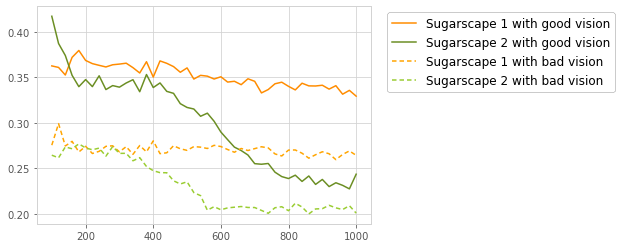

In [186]:
x = sugar1_mean['initial-population']
y1 = sugar1_mean['(count good_vision_turtles) / (initial-population)']
y2 = sugar2_mean['(count good_vision_turtles) / (initial-population)']
y3 = sugar1_mean['(count bad_vision_turtles) / (initial-population)']
y4 = sugar2_mean['(count bad_vision_turtles) / (initial-population)']

fig, ax = plt.subplots()
#fig = plt.figure(figsize=(30,20))
# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y1, label='Sugarscape 1 with good vision',color='darkorange')

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y2, label='Sugarscape 2 with good vision',color='olivedrab')

line3, = ax.plot(x,y3,label='Sugarscape 1 with bad vision',color='orange')
line3.set_dashes([3, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
line4, = ax.plot(x,y4,label='Sugarscape 2 with bad vision',color='yellowgreen')
line4.set_dashes([3, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

ax.spines['bottom'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')

fontP = FontProperties()
fontP.set_size('large')
#ax.legend(handles=[line1, line2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

legend = ax.legend(handles=[line1, line2,line3,line4], bbox_to_anchor=(1.03, 1), loc='upper left', prop=fontP)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('grey')

ax.grid(True,color='lightgrey')

ax.set_facecolor('xkcd:white')
plt.show()

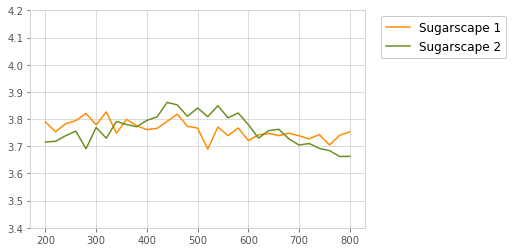

<Figure size 1296x864 with 0 Axes>

In [170]:


x = sugar1_mean['initial-population']
y1 = sugar1_mean['mean [vision] of turtles']
y2 = sugar2_mean['mean [vision] of turtles']
fig, ax = plt.subplots()
fig = plt.figure(figsize=(18,12))


line1, = ax.plot(x, y1, label='Sugarscape 1',color='darkorange')

line2, = ax.plot(x, y2, label='Sugarscape 2',color='olivedrab')

ax.spines['bottom'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')

fontP = FontProperties()
fontP.set_size('large')
#ax.legend(handles=[line1, line2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

legend = ax.legend(handles=[line1, line2], bbox_to_anchor=(1.03, 1), loc='upper left', prop=fontP)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('grey')

ax.grid(True,color='lightgrey')
ax.set_ylim([3.4, 4.2])     # set the ylim to bottom, top
ax.set_facecolor('xkcd:white')

plt.show()

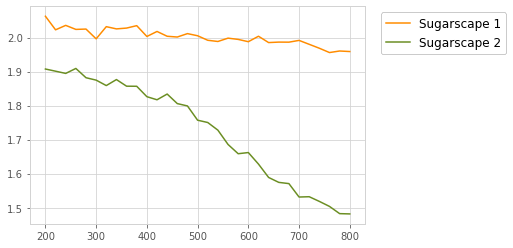

<Figure size 1296x864 with 0 Axes>

In [163]:

x = sugar1_mean['initial-population']
y1 = sugar1_mean['mean [metabolism] of turtles']
y2 = sugar2_mean['mean [metabolism] of turtles']

fig, ax = plt.subplots()

fig = plt.figure(figsize=(18,12))
# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y1, label='Sugarscape 1',color='darkorange')
#line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x, y2, label='Sugarscape 2',color='olivedrab')

ax.spines['bottom'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey')
ax.spines['left'].set_color('lightgrey')
ax.spines['right'].set_color('lightgrey')

fontP = FontProperties()
fontP.set_size('large')
#ax.legend(handles=[line1, line2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

legend = ax.legend(handles=[line1, line2], bbox_to_anchor=(1.03, 1), loc='upper left', prop=fontP)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('grey')

ax.grid(True,color='lightgrey')

ax.set_facecolor('xkcd:white')
plt.show()